In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
file_path ='resources/mid_fielders.csv'
mid_fielders_df = pd.read_csv(file_path)
mid_fielders_df['rating'] = (mid_fielders_df['potential'].astype(int) + mid_fielders_df['overall'].astype(int))/2
mid_fielders_df['rating'] = mid_fielders_df['rating'].apply(np.int64)


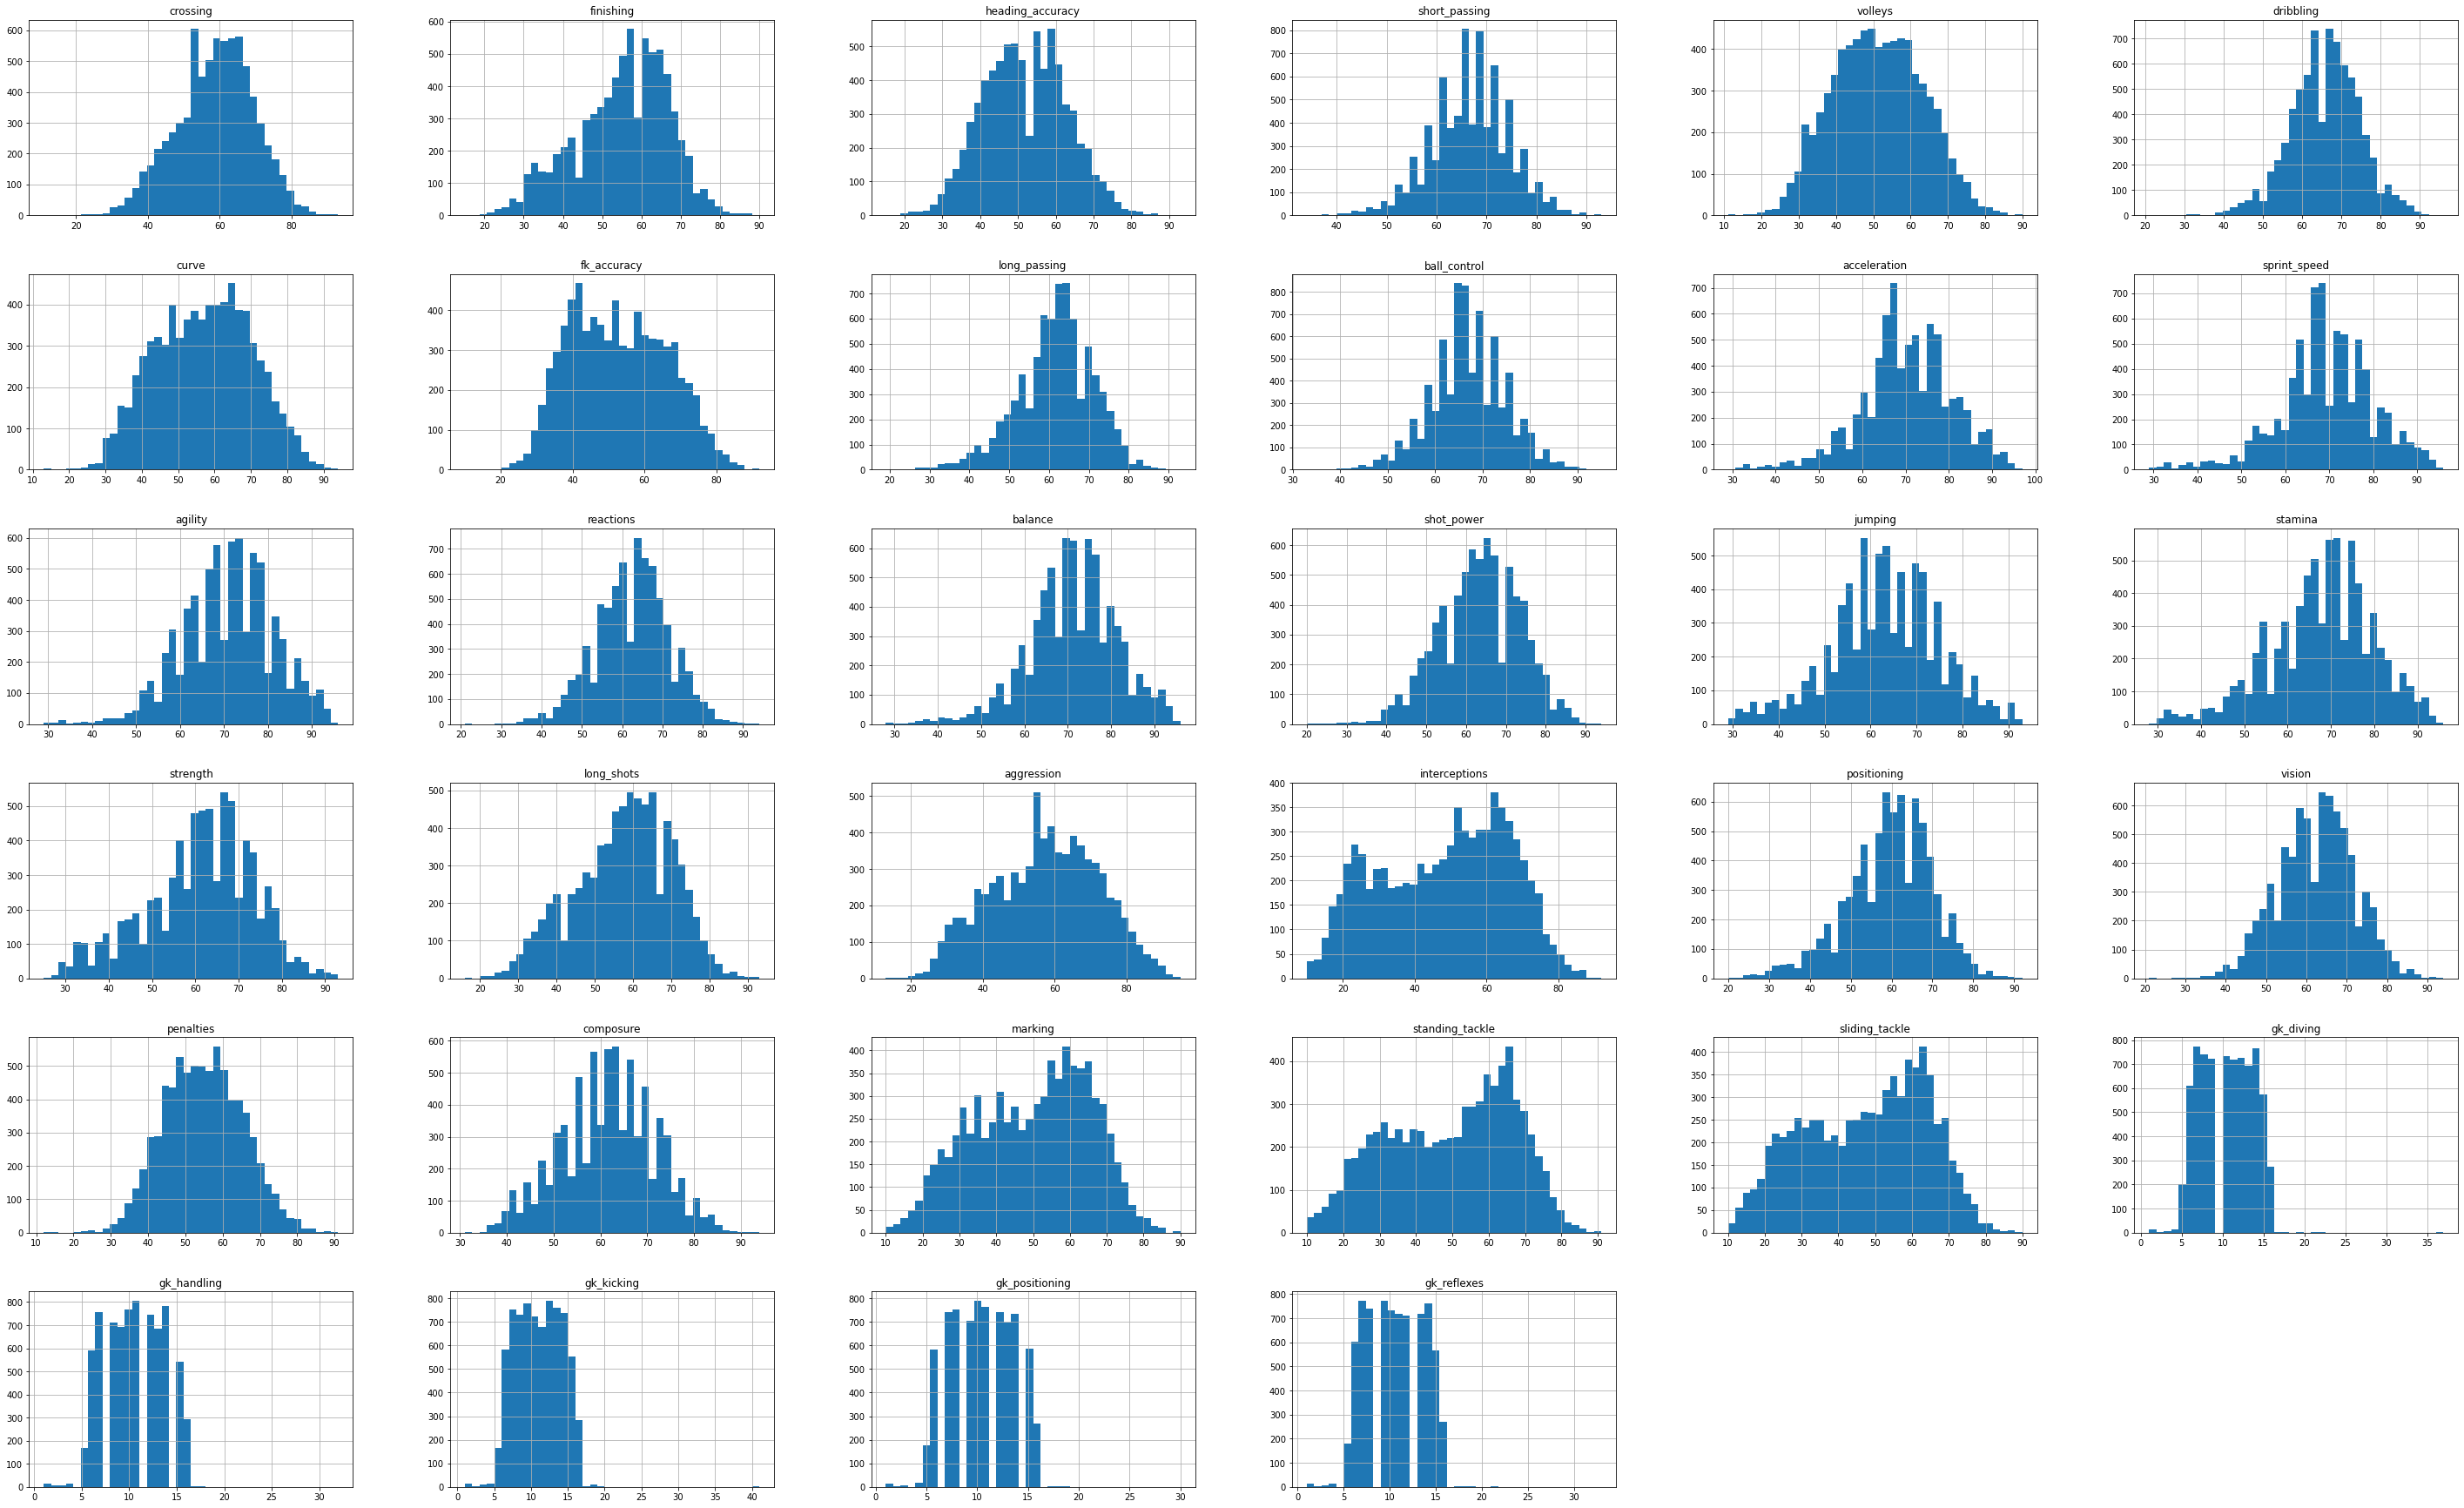

In [3]:
mid_fielders_df.drop(['rating', 'weight', 'overall', 'potential'], axis = 1).hist(bins=40, figsize=(50,31))
plt.show()

In [4]:
mid_fielders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7589 entries, 0 to 7588
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   overall           7589 non-null   int64 
 1   potential         7589 non-null   int64 
 2   field_position    7589 non-null   object
 3   height            7589 non-null   object
 4   weight            7589 non-null   object
 5   crossing          7589 non-null   int64 
 6   finishing         7589 non-null   int64 
 7   heading_accuracy  7589 non-null   int64 
 8   short_passing     7589 non-null   int64 
 9   volleys           7589 non-null   int64 
 10  dribbling         7589 non-null   int64 
 11  curve             7589 non-null   int64 
 12  fk_accuracy       7589 non-null   int64 
 13  long_passing      7589 non-null   int64 
 14  ball_control      7589 non-null   int64 
 15  acceleration      7589 non-null   int64 
 16  sprint_speed      7589 non-null   int64 
 17  agility       

In [5]:
mid_fielders_df.isna().any()

overall             False
potential           False
field_position      False
height              False
weight              False
crossing            False
finishing           False
heading_accuracy    False
short_passing       False
volleys             False
dribbling           False
curve               False
fk_accuracy         False
long_passing        False
ball_control        False
acceleration        False
sprint_speed        False
agility             False
reactions           False
balance             False
shot_power          False
jumping             False
stamina             False
strength            False
long_shots          False
aggression          False
interceptions       False
positioning         False
vision              False
penalties           False
composure           False
marking             False
standing_tackle     False
sliding_tackle      False
gk_diving           False
gk_handling         False
gk_kicking          False
gk_positioning      False
gk_reflexes 

In [6]:
list(mid_fielders_df)

['overall',
 'potential',
 'field_position',
 'height',
 'weight',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'rating']

In [7]:
# Define Columns we will include
columns = ['field_position', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping',
    'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking',
    'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rating']

# Create varible for players by position 
#defenders = ['RWB', 'RCB', 'RB', 'LCB', 'CB', 'LWB', 'LB']

# Fit columns into df
mid_fielders_df = mid_fielders_df[columns]

#Print df
mid_fielders_df

,field_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,LW,79,87,62,84,84,96,88,87,78,...,94,27,24,33,9,9,15,15,11,92
1,RCM,93,82,55,92,82,86,85,83,91,...,88,68,58,51,15,13,5,10,13,91
2,RCM,86,72,55,93,76,90,85,78,88,...,84,60,76,73,13,9,7,14,9,91
3,LCM,88,76,54,92,82,81,86,84,93,...,85,72,79,69,10,11,13,7,10,90
4,LCM,84,76,54,93,82,89,82,77,87,...,93,59,53,29,6,15,7,6,12,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7584,CM,44,44,36,53,43,50,48,46,52,...,52,41,47,38,13,6,9,10,15,54
7585,CM,31,31,41,51,26,46,35,31,55,...,40,48,49,49,7,7,9,14,15,58
7586,CM,34,38,40,49,25,42,30,34,45,...,45,40,48,47,10,13,7,8,9,56
7587,RW,44,50,39,42,40,51,34,32,32,...,46,20,25,27,14,6,14,8,9,56


In [8]:
#Create train_set and test_set
train_set, test_set = train_test_split(mid_fielders_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(mid_fielders_df))

target_train = train_set['rating']
train_set = train_set.drop(['rating'], axis = 1)

Length of training data: 6071
Length of testing data: 1518
Length of total data: 7589


In [9]:
for position_value in mid_fielders_df['field_position'].unique():
    
    corr_matrix = mid_fielders_df[mid_fielders_df['field_position'] == position_value].corr()['rating'].to_frame()
    temp_df = corr_matrix['rating'].sort_values(ascending=False)
    
    print(f'********** Current Position: {position_value}: \n ')
    
    print(temp_df)
    
    print('\n')

    print(f'-------------------------------------------------------------')
    
    print('\n')


********** Current Position: LW: 
 
rating              1.000000
ball_control        0.874690
dribbling           0.871429
short_passing       0.780956
composure           0.732641
reactions           0.727753
vision              0.714738
positioning         0.712994
long_shots          0.689693
crossing            0.664151
finishing           0.648135
curve               0.635146
shot_power          0.624672
volleys             0.611346
long_passing        0.599203
fk_accuracy         0.495236
agility             0.491471
acceleration        0.490841
penalties           0.451546
stamina             0.419787
sprint_speed        0.415410
aggression          0.310811
balance             0.301881
heading_accuracy    0.264978
marking             0.197499
strength            0.168500
interceptions       0.168302
standing_tackle     0.166189
jumping             0.140701
sliding_tackle      0.091318
gk_positioning      0.059519
gk_diving           0.037602
gk_kicking          0.014743
gk_refl


********** Current Position: CM: 
 
rating              1.000000
ball_control        0.878333
short_passing       0.870796
long_passing        0.849508
dribbling           0.844234
vision              0.821802
reactions           0.777190
composure           0.741682
long_shots          0.691019
positioning         0.671132
crossing            0.656174
shot_power          0.654916
standing_tackle     0.652583
interceptions       0.640746
finishing           0.619318
curve               0.615765
marking             0.583221
volleys             0.571552
fk_accuracy         0.538735
sliding_tackle      0.534159
penalties           0.504960
stamina             0.464140
aggression          0.418348
heading_accuracy    0.400349
agility             0.342422
strength            0.319369
acceleration        0.210433
jumping             0.187515
sprint_speed        0.149997
balance             0.139794
gk_positioning      0.066918
gk_kicking          0.029987
gk_reflexes         0.029089
gk_han

In [10]:
for position in mid_fielders_df['field_position'].unique(): 
    
    try:
    
        # Subset by position
        temp_df = mid_fielders_df[mid_fielders_df['field_position'] == position]

        # Find correlations
        temp_corr = mid_fielders_df[mid_fielders_df['field_position'] == position].corr()['rating'].to_frame()
        temp_corr = temp_corr[temp_corr['rating'] > 0.5]


        # Keep only columns with correltion above 0.5
        temp_features = list(temp_corr.T)
        temp_model_df = temp_df[temp_features]

        #print(temp_features)
        # Split data into train and test, isolate y (target/dependent variable)
        train_set, test_set = train_test_split(temp_model_df, test_size=0.2, random_state=42)
        target_train = train_set['rating']
        train_set = train_set.drop(['rating'], axis = 1) #, 'potential', 'overall'], axis = 1)
        

        # Fit model
        train_set = sm.add_constant(train_set, prepend=False)

        # Fit and summarize OLS model
        mod = sm.OLS(target_train, train_set)

        res = mod.fit()
        
        features = pd.DataFrame([res.pvalues, res.params]).T
        features.columns = ['P-value', 'Coefficient']
        features = features[features['P-value']<0.05]
        features = features.sort_values(by = 'Coefficient', ascending = False)
    

        print(f' ********* Current Position: {position}: \n ')
        print(f' ********* Significant features in order of impact: {features.index}: \n ')
        print(res.summary())
        print('\n')
        
    except BaseException as e: 
        print(f'WARNING: SKIPPING {position} due to {e}')

 ********* Current Position: LW: 
 
 ********* Significant features in order of impact: Index(['const', 'dribbling', 'ball_control', 'short_passing', 'finishing'], dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     90.84
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           6.30e-97
Time:                        20:31:30   Log-Likelihood:                -696.67
No. Observations:                 304   AIC:                             1423.
Df Residuals:                     289   BIC:                             1479.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef  

 
 ********* Significant features in order of impact: Index(['const', 'ball_control', 'dribbling', 'short_passing', 'vision',
       'finishing', 'crossing', 'penalties'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     218.5
Date:                Sun, 18 Jul 2021   Prob (F-statistic):          3.80e-269
Time:                        20:31:30   Log-Likelihood:                -1793.5
No. Observations:                 766   AIC:                             3621.
Df Residuals:                     749   BIC:                             3700.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
            

strong multicollinearity or other numerical problems.


 ********* Current Position: LAM: 
 
 ********* Significant features in order of impact: Index([], dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     2.709
Date:                Sun, 18 Jul 2021   Prob (F-statistic):              0.447
Time:                        20:31:30   Log-Likelihood:                -3.8420
No. Observations:                  16   AIC:                             37.68
Df Residuals:                       1   BIC:                             49.27
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err

 
 ********* Significant features in order of impact: Index(['const', 'dribbling', 'ball_control', 'short_passing', 'finishing',
       'agility', 'positioning', 'long_shots', 'crossing'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sun, 18 Jul 2021   Prob (F-statistic):          2.51e-109
Time:                        20:31:30   Log-Likelihood:                -662.52
No. Observations:                 296   AIC:                             1359.
Df Residuals:                     279   BIC:                             1422.
Df Model:                          16                                         
Covariance Type:            nonrobust                                     

C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "





 ********* Current Position: RAM: 
 
 ********* Significant features in order of impact: Index(['ball_control', 'short_passing'], dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     12.08
Date:                Sun, 18 Jul 2021   Prob (F-statistic):            0.00658
Time:                        20:31:30   Log-Likelihood:                -12.171
No. Observations:                  16   AIC:                             46.34
Df Residuals:                       5   BIC:                             54.84
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.